@github:fengyuyun https://github.com/fengwuyun
    
参考代码：https://github.com/fengdu78/lihang-code
    
1. 增加了感知机对偶形式的实现
2. 增加了部分注释

<h1>感知机<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#第2章-感知机" data-toc-modified-id="第2章-感知机-1">第2章 感知机</a></span><ul class="toc-item"><li><span><a href="#2.1-基础理论" data-toc-modified-id="2.1-基础理论-1.1">2.1 基础理论</a></span></li><li><span><a href="#2.2-Perceptron" data-toc-modified-id="2.2-Perceptron-1.2">2.2 Perceptron</a></span><ul class="toc-item"><li><span><a href="#2.2.1-原始形式" data-toc-modified-id="2.2.1-原始形式-1.2.1">2.2.1 原始形式</a></span></li><li><span><a href="#2.2.2-对偶形式" data-toc-modified-id="2.2.2-对偶形式-1.2.2">2.2.2 对偶形式</a></span></li></ul></li><li><span><a href="#2.3-scikit-learn实例" data-toc-modified-id="2.3-scikit-learn实例-1.3">2.3 scikit-learn实例</a></span></li></ul></li></ul></div>

# 第2章 感知机

## 2.1 基础理论

1．感知机是根据输入实例的特征向量 $x$ 对其进行二类分类的线性分类模型：

$$
f(x)=\operatorname{sign}(w \cdot x+b)
$$

感知机模型对应于输入空间（特征空间）中的分离超平面 $w \cdot x+b=0$。

2．感知机学习的策略是极小化损失函数：

$$
\min _{w, b} L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$

损失函数对应于误分类点到分离超平面的总距离。

3．感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有原始形式和对偶形式。算法简单且易于实现。原始形式中，首先任意选取一个超平面，然后用梯度下降法不断极小化目标函数。在这个过程中一次随机选取一个误分类点使其梯度下降。
 
4．当训练数据集线性可分时，感知机学习算法是收敛的。感知机算法在训练数据集上的误分类次数$k$满足不等式：

$$
k \leqslant\left(\frac{R}{\gamma}\right)^{2}
$$

当训练数据集线性可分时，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能有所不同。

5．对偶形式的基本想法是，将 w 和 b 表示为实例 $x_{i}$ 和标记 $y_{i}$ 的线性组合的形式，通过求解其系数得到 w 和 b。

$$
\omega = \sum^{N}_{i=1} \alpha_{i} y_{i} x_{i}
$$
$$
b = \sum^N_{i=1} \alpha_{i}y_{i}
$$
6．对偶形式中训练实例仅以内积的形式出现，使用Gram 矩阵保存计算好的内积可以加快模型训练。

拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(222)

In [2]:
!python -V

Python 3.7.7


In [3]:
#load data 
iris = load_iris()
#查看iris
print(iris.keys())
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
df.columns = ['sepal length', 'sepal width',
              'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

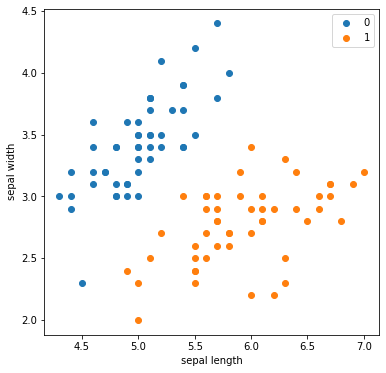

In [5]:
plt.figure(figsize=(6,6))
#label 为 0 的数据
plt.scatter(df['sepal length'][:50], df['sepal width'][:50], label='0')
#label 为 1 的数据
plt.scatter(df['sepal length'][50:100], df['sepal width'][50:100], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [6]:
df.iloc[:100, [0, 1, -1]]

,sepal length,sepal width,label
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1


In [7]:
# 选取 df 数组[0,100)行，第 0，1和最后一列的数据
data = np.array(df.iloc[:100, [0, 1, -1]])

In [8]:
# X 为data中不包含最后一列的值，y为data中最后一列的值
X, y = data[:, :-1], data[:, -1]

In [9]:
#根据y是否等于1将数据集划分为正负例
y = np.array([1 if i == 1 else -1 for i in y])

##  2.2 Perceptron

### 2.2.1 原始形式

参数更新：

$$
w \leftarrow w + \eta y_{i}x_{i} 
$$
$$
b \leftarrow b + \eta y_{i}
$$

In [10]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1#0.01 0.02 
        #self.data = data
        
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    def fit(self, X_train, y_train):
        #梯度下降法
        #用来标记是否还有误分类点
        is_wrong = False
        while not is_wrong:
            #误分类点计数
            wrong_count = 0
            #遍历每个点进行判断
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                #选取误分类点进行更新
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w += self.l_rate * np.dot(y, X)
                    self.b += self.l_rate * y
                    wrong_count += 1
            #如果没有误分类点，结束训练
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'
    
    def score(self):
        pass

In [11]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

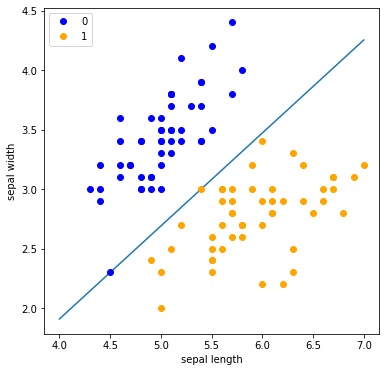

In [12]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]

plt.figure(figsize=(6,6))
#分类超平面
plt.plot(x_points, y_)
#训练集中实例点
plt.plot(data[:50, 0], data[:50,1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

### 2.2.2 对偶形式

参数更新：

$$
\alpha_{i} \leftarrow \alpha_{i} + \eta
$$
$$
b \leftarrow b + \eta y_{i}
$$

In [13]:
class Dual_Model:
    def __init__(self):
        #用a代替w
        self.a = np.zeros(len(data), dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1  # 0.01 0.02
        #self.data = data

    def sign(self, w, b):
        #y = np.dot(w, x) + b
        return w + b

    def fit(self, X_train, y_train):
        # 梯度下降法对偶算法
        # 用来标记是否还有误分类点
        is_wrong = False
        gram = np.array(np.dot(np.matrix(X_train), np.matrix(X_train).T))
        while not is_wrong:
            # 误分类点计数
            wrong_count = 0
            # 遍历每个点进行判断
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                # 选取误分类点进行更新
                #计算权重，w_x 是 w*x 的值
                w_x = np.dot(self.a,np.multiply(y_train,gram[d]))
                if y * self.sign(w_x, self.b) <= 0:
                    self.a[d] += self.l_rate
                    self.b += self.l_rate * y
                    wrong_count += 1
            # 如果没有误分类点
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Dual_Model!'
    
    def score(self):
        pass

In [14]:
dual_perceptron = Dual_Model()
dual_perceptron.fit(X, y)

'Perceptron Dual_Model!'

在对偶算法中 w 由 $\alpha$ 代替，可以根据 $\alpha$ 计算 w, b

In [15]:
w = np.dot(np.multiply(dual_perceptron.a, y), X)
b = np.dot(dual_perceptron.a, y)

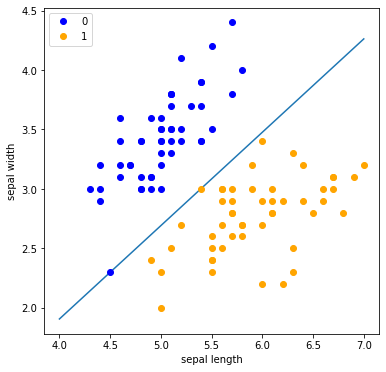

In [16]:
x_points = np.linspace(4, 7, 10)
y_ = -(w[0] * x_points + b) / w[1]

plt.figure(figsize=(6,6))
plt.plot(x_points, y_)
plt.plot(data[:50, 0], data[:50,1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

## 2.3 scikit-learn实例

In [17]:
import sklearn
from sklearn.linear_model import Perceptron

In [18]:
sklearn.__version__

'0.23.1'

In [19]:
#fit_intercept:是否估计截距
#max_iteabsr：最大迭代次数
#shuffle:每轮训练后是否打乱数据
#tol:默认1e-3,如果不是None,训练将会在 loss > previous _ loss-tol 时停止
clf = Perceptron(fit_intercept=True, max_iter=1000,shuffle=True)
clf.fit(X, y)

Perceptron()

In [20]:
#权重W
print(clf.coef_)

[[ 23.2 -38.7]]


In [21]:
#截距b
print(clf.intercept_)

[-5.]


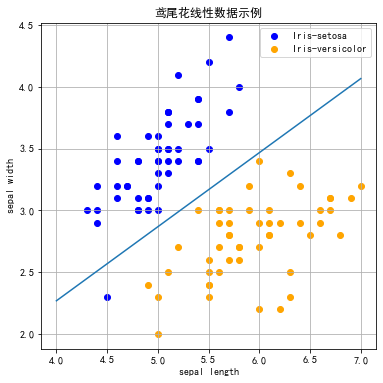

In [22]:
# 画布大小
plt.figure(figsize=(6,6))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(True)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

**注意 !**

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个`tol`参数。

`tol` 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 `tol=None` 使之可以继续迭代：

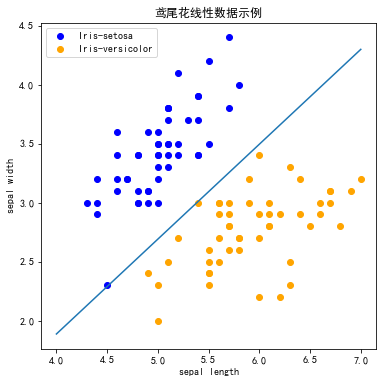

In [23]:
clf = Perceptron(fit_intercept=True, max_iter=1000, tol=None, shuffle=True)
clf.fit(X, y)

# 画布大小
plt.figure(figsize=(6,6))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

现在可以看到，所有的两种鸢尾花都被正确分类了。